In [1]:
import yfinance as yf

# Descarga de datos de Tesla
tesla_data = yf.Ticker("TSLA").history(period="5y")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(tesla_data.head())

                       Date       Open       High        Low      Close  \
0 2019-11-13 00:00:00-05:00  23.666668  23.755333  23.011999  23.073999   
1 2019-11-14 00:00:00-05:00  23.073999  23.589333  22.860666  23.290001   
2 2019-11-15 00:00:00-05:00  23.375999  23.520000  23.224001  23.478001   
3 2019-11-18 00:00:00-05:00  23.528000  23.543333  23.073334  23.332666   
4 2019-11-19 00:00:00-05:00  23.450001  23.999332  23.186666  23.968000   

      Volume  Dividends  Stock Splits  
0  126301500        0.0           0.0  
1   96973500        0.0           0.0  
2   72135000        0.0           0.0  
3   66006000        0.0           0.0  
4  115872000        0.0           0.0  


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# URL de la página web para obtener datos de ingresos de Tesla
url = 'https://en.wikipedia.org/wiki/Tesla,_Inc.'

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar la tabla deseada (puede variar dependiendo de la estructura actual de la página)
tables = soup.find_all('table')
for table in tables:
    if "Revenue" in str(table):
        # Convertir la tabla HTML a un string y envolverla en un objeto StringIO
        table_str = str(table)
        table_io = StringIO(table_str)
        # Extraer la tabla usando read_html
        df = pd.read_html(table_io)[0]
        break

# Limpiar y mostrar los datos
df.columns = df.iloc[0]  # Asignar la primera fila como encabezado
tesla_revenue = df[1:]   # Excluir la fila de encabezado duplicada

# Mostrar las últimas 5 filas
print(tesla_revenue.tail())

0                                                 NaN  \
23                                       Subsidiaries   
24                                                NaN   
25                                                ASN   
26                                            Website   
27  Footnotes / references Financials as of Decemb...   

0                                                 NaN  
23                       Tesla AutomationTesla Energy  
24                                                NaN  
25                                             394161  
26                                          tesla.com  
27  Footnotes / references Financials as of Decemb...  


In [7]:
import yfinance as yf

# Descargar datos de GameStop (GME)
gme_data = yf.Ticker("GME").history(period="5y")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(gme_data.head())



                       Date    Open    High     Low  Close    Volume  \
0 2019-11-13 00:00:00-05:00  1.4775  1.4925  1.4525  1.485   6134400   
1 2019-11-14 00:00:00-05:00  1.4875  1.5275  1.4750  1.495   6834800   
2 2019-11-15 00:00:00-05:00  1.5000  1.5025  1.4625  1.470   8663600   
3 2019-11-18 00:00:00-05:00  1.4625  1.4625  1.4025  1.405  11983600   
4 2019-11-19 00:00:00-05:00  1.3925  1.4150  1.3625  1.375  13442000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# URL de la página que contiene los ingresos de GameStop
url = 'https://en.wikipedia.org/wiki/GameStop'

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar todas las tablas y filtrar la que contiene los ingresos
tables = soup.find_all('table')
for table in tables:
    if "Revenue" in str(table):
        # Convertir la tabla HTML a un string y envolverlo en un objeto StringIO
        table_str = str(table)
        table_io = StringIO(table_str)
        # Extraer la tabla usando read_html
        gme_revenue = pd.read_html(table_io)[0]
        break

# Limpiar y mostrar las últimas 5 filas
gme_revenue.columns = gme_revenue.iloc[0]  # Asignar la primera fila como encabezado
gme_revenue = gme_revenue[1:]             # Excluir la fila de encabezado duplicada

# Mostrar las últimas 5 filas
print(gme_revenue.tail())

0              Logo since 2000  \
18         Number of employees   
19                      Parent   
20                Subsidiaries   
21                     Website   
22  Footnotes / references [1]   

0                                     Logo since 2000  
18  8,000 full-time; 13,000–18,000 part-time (Feb ...  
19  NeoStar Retail Group (1994–1996) Babbage's Etc...  
20  Babbage'sEB GamesEB Games AustraliaGame Inform...  
21                                       gamestop.com  
22                         Footnotes / references [1]  


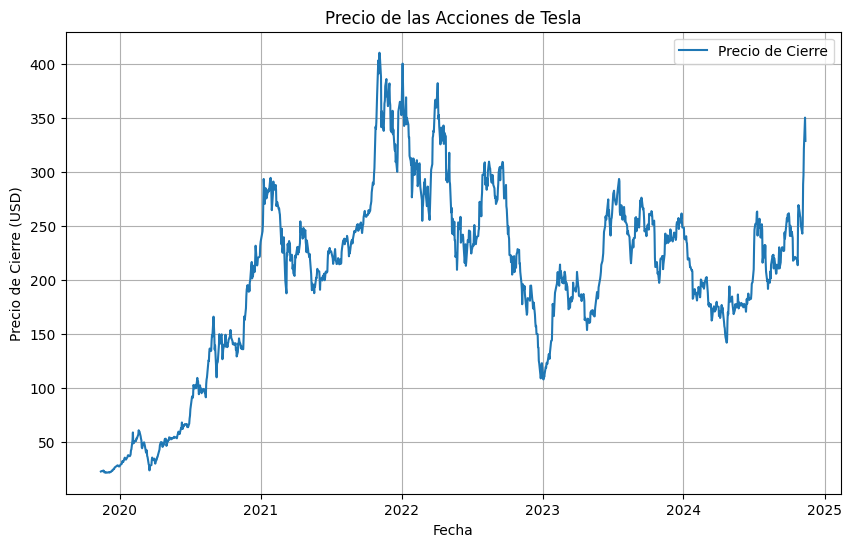

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de Tesla
tesla_data = yf.Ticker("TSLA").history(period="5y")

# Definir la función para graficar
def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Precio de Cierre')
    plt.title('Precio de las Acciones de Tesla')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
make_graph(tesla_data)

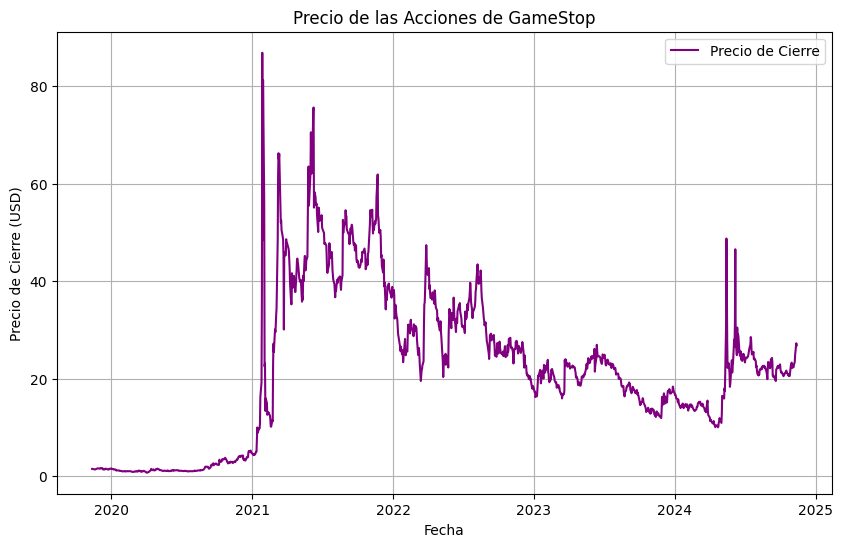

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de GameStop
gme_data = yf.Ticker("GME").history(period="5y")

# Definir la función para graficar
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Precio de Cierre', color='purple')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
make_graph(gme_data, 'Precio de las Acciones de GameStop')